# Tumor metaprograms - number of genes per cell 
Extended Data Figure 2A

- Author: CW 
- files needed: 3_tumor_metaprograms.rds
- Last updated: 04/11/24

#### load data

In [2]:
library(Seurat)

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.4 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode



In [1]:
obj.tumor <- readRDS('/net/bmc-lab5/data/kellis/group/scCancer2023/objects_for_DC_manuscript/for_public/3_tumor_metaprograms.rds')

In [3]:
unique(obj.tumor@meta.data$metaprogram)

[1] "NA"                        "Secreted I"               
 [3] "Hypoxia"                   "Unassigned"               
 [5] "Stress"                    "Respiration"              
 [7] "Cell Cycle HMG-rich"       "Cell Cycle - G2/M"        
 [9] "Cell Cycle - G1/S"         "Unfolded protein response"
[11] "EMT-III"                   "MYC"                      
[13] "Protein maturation"        "Skin-pigmentation"        
[15] "Interferon/MHC-II (I)"     "Stress (in vitro)"        
[17] "Translation initiation"    "Chromatin"

In [4]:
#subset out chromatin cell
obj.tumor.filt <- subset(obj.tumor, subset = metaprogram == 'Chromatin', invert = TRUE)

In [5]:
obj.tumor.filt$metaprogram <- factor(obj.tumor.filt$metaprogram, levels = c('Cell Cycle - G1/S', 'Cell Cycle - G2/M', 'Cell Cycle HMG-rich',
                                                            'Chromatin', 'EMT-III', 'Hypoxia', 'Interferon/MHC-II (I)', 
                                                            'MYC', 'Protein maturation', 'Respiration',
                                                            'Secreted I', 'Skin-pigmentation', 'Stress', 
                                                            'Stress (in vitro)', 'Translation initiation',
                                                            'Unassigned','Unfolded protein response','NA'))

## UMAP 

In [8]:
library(scales)
colors <- append(hue_pal()(16), 'grey')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



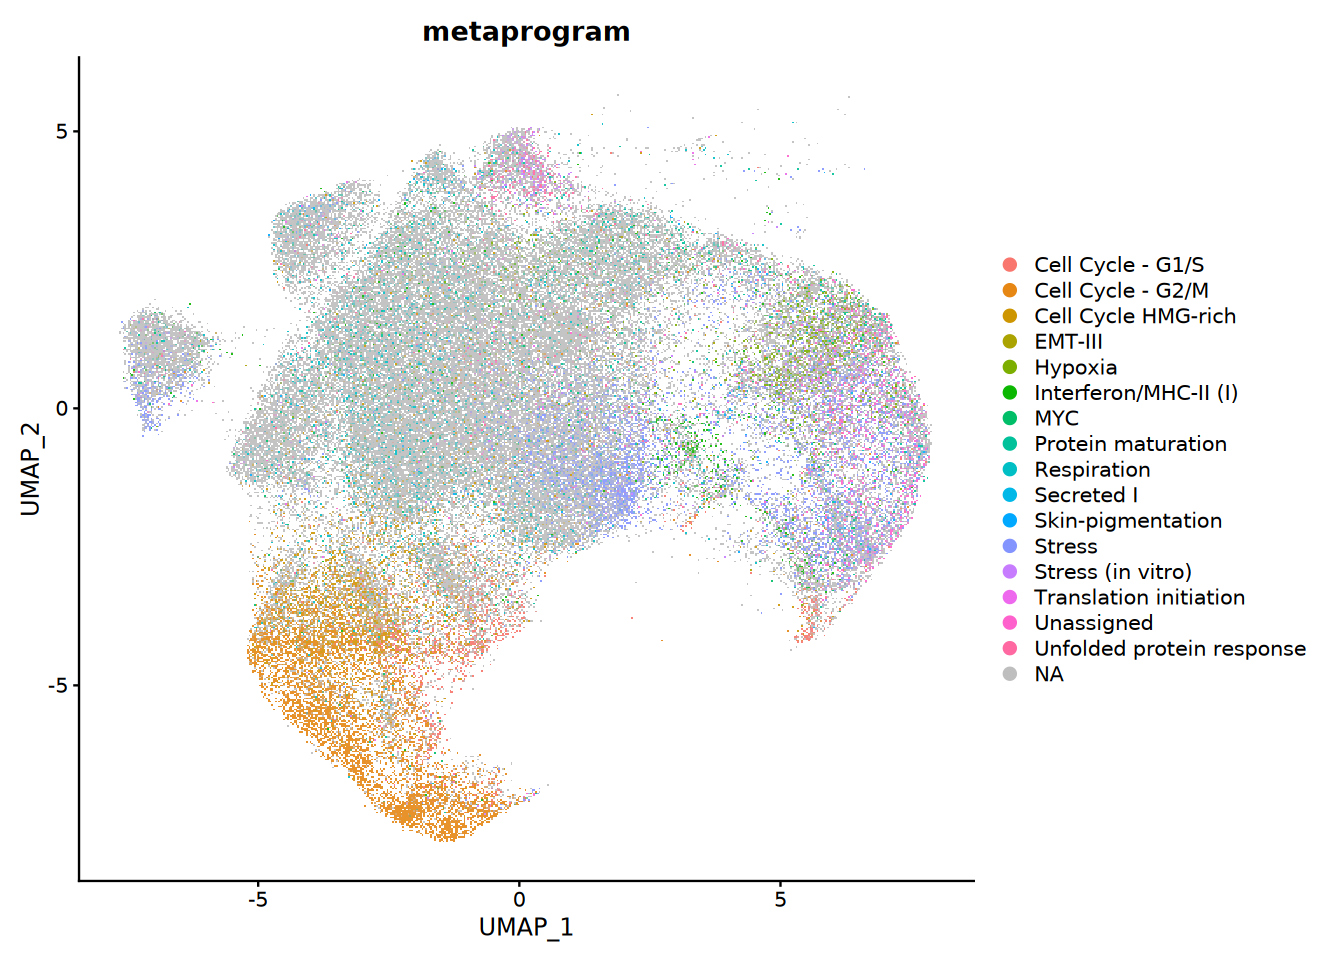

In [12]:
options(repr.plot.width = 11, repr.plot.height = 8)
DimPlot(obj.tumor.filt, group.by = 'metaprogram', pt.size = 0.9, cols = colors)

## Violin plots

### look at number of genes per metaprogram category - Extended Data Figure 3A

In [8]:
library(ggplot2)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



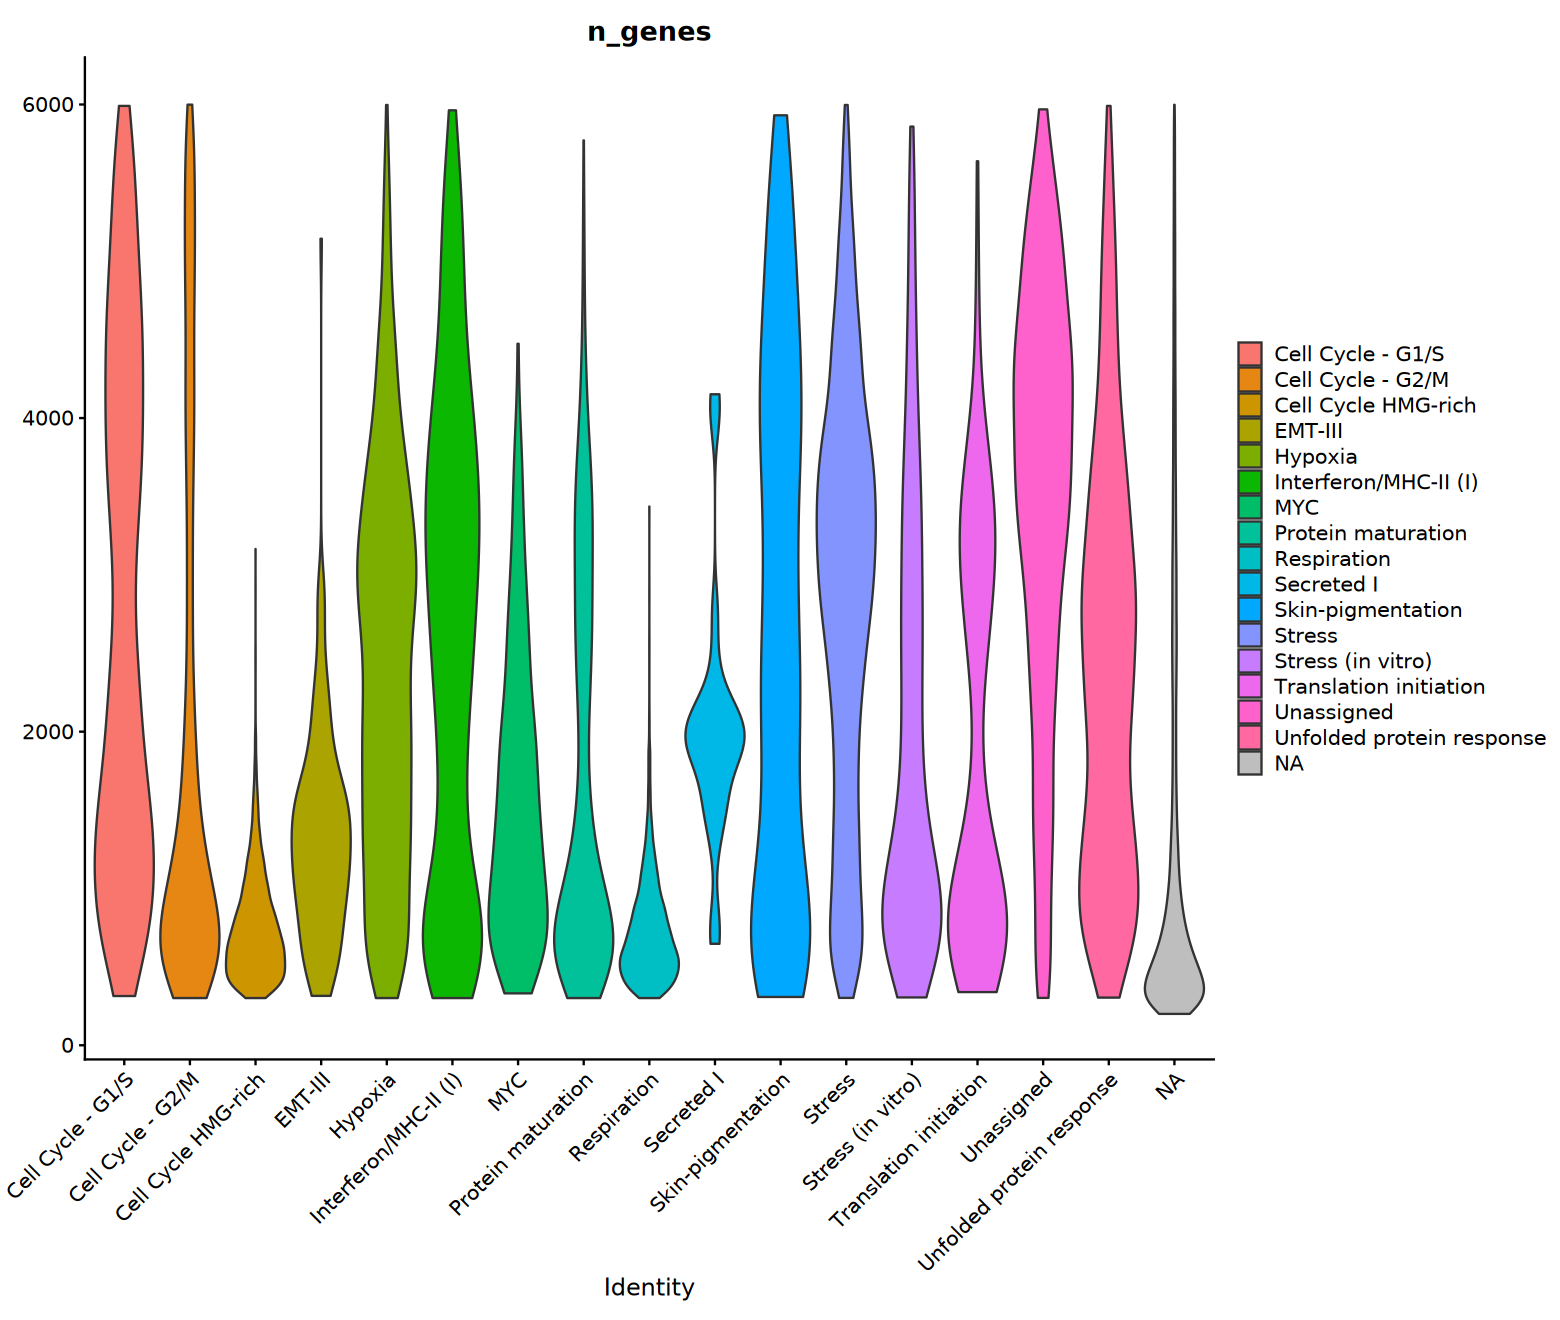

In [13]:
#EXTENDED FIGURE 3A
Idents(obj.tumor.filt) <- obj.tumor.filt$metaprogram

options(repr.plot.width = 13, repr.plot.height = 11)
VlnPlot(obj.tumor.filt, features = 'n_genes', cols = colors, pt.size = 0, 
        y.max = 6010)

### look at number of  molecules (ncount RNA)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



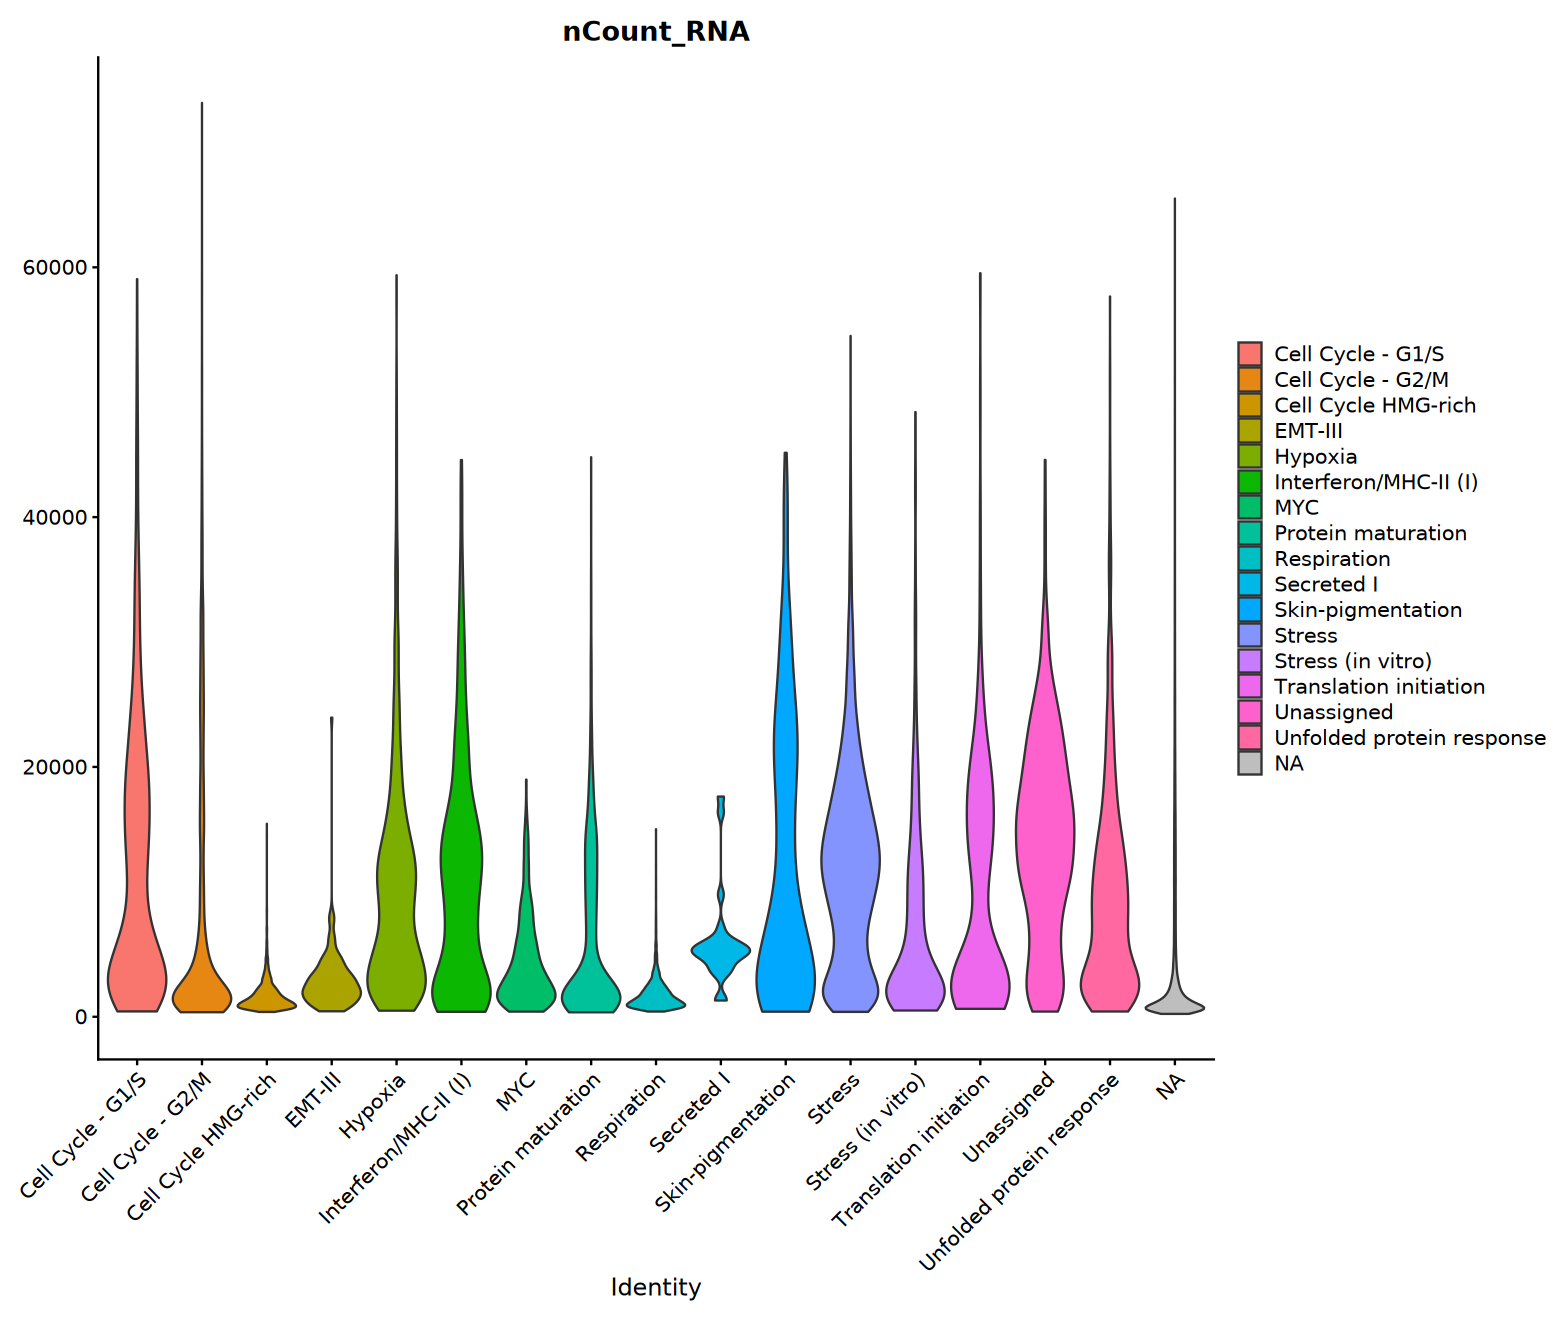

In [12]:
Idents(obj.tumor.filt) <- obj.tumor.filt$metaprogram

options(repr.plot.width = 13, repr.plot.height = 11)
VlnPlot(obj.tumor.filt, features = 'nCount_RNA', pt.size = 0, cols = colors)